In [5]:
from transformers import GPT2LMHeadModel # type: ignore

In [7]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")

# State dict are   the raw tensors.
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [15]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

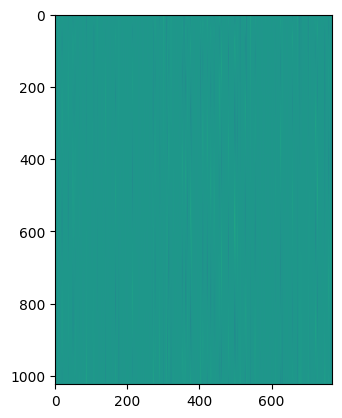

In [18]:
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline

# Let's plot the weights of the position embeddings.
plt.imshow(sd_hf["transformer.wpe.weight"])

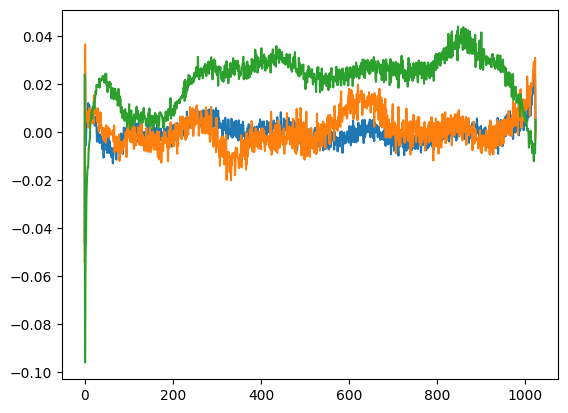

In [23]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

# Becuause the lines are a little bit jagged, the model seems to be a little bit undertrained.

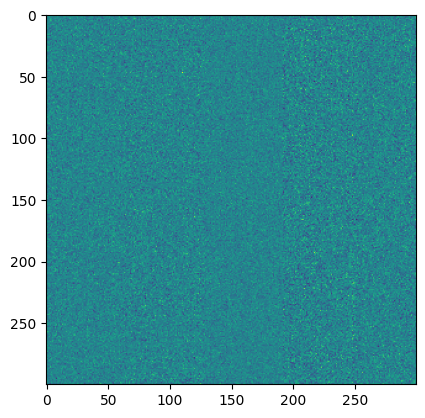

In [26]:
plt.imshow(sd_hf["transformer.h.0.attn.c_attn.weight"][:300, :300])

In [30]:
from transformers import pipeline, set_seed # type: ignore
generator = pipeline('text-generation', model="gpt2")
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}]

In [58]:
import torch
import torch.nn as nn

tt = dict(
    l1 = nn.Embedding(10, 3),
    l2 = nn.Embedding(10, 3)
)

nn.ModuleDict(tt)






ModuleDict(
  (a): Embedding(10, 3)
  (b): Embedding(10, 3)
)

### How `nn.Module` works

In [70]:
import torch
import torch.nn as nn

# Define a model with nn.ModuleDict
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layers = nn.ModuleDict({
            'layer1': nn.Linear(10, 20),
            'layer2': nn.Conv2d(1, 10, kernel_size=3, stride=1, padding=1),
            'layer3': nn.Embedding(10, 3)
        })
        self.lm_head = nn.Linear(10,10)

    def forward(self, x, layer_key):
        # Select layer based on the key and apply it to input x
        layer = self.layers[layer_key]
        return layer(x)

# Instantiate the model
model = MyModel()

# Example input for layer1 (nn.Linear)
x = torch.randn(1, 10)
output = model(x, 'layer1')
print(output)

# Example input for layer2 (nn.Conv2d)
x = torch.randn(1, 1, 8, 8)
output = model(x, 'layer2')
print(output)

tensor([[-0.2606, -0.3762, -0.0589,  0.9067, -0.4679,  0.4231, -0.4468, -0.0758,
         -0.4024, -0.8043,  0.1240,  1.4276, -0.5699, -0.8434,  0.9884, -0.1427,
          1.4463, -1.0785, -0.4628, -1.3289]], grad_fn=<AddmmBackward0>)
tensor([[[[-5.3707e-01, -6.2015e-01, -9.3686e-01, -3.0671e-01, -5.9842e-01,
           -1.7637e+00, -6.7395e-01, -5.6978e-01],
          [ 1.1262e+00,  1.0210e+00, -2.1943e-01, -4.6725e-01, -7.7963e-01,
           -1.9837e-02, -1.0666e+00, -8.2108e-01],
          [-2.6279e-02, -6.3334e-01, -5.0644e-01, -1.1837e+00, -5.6827e-01,
           -2.4087e+00, -2.9671e-02,  1.1063e+00],
          [ 4.0520e-01, -1.8066e-02,  4.9238e-01, -7.0682e-02, -7.2455e-01,
            4.0986e-01, -3.2403e-01, -1.2631e+00],
          [ 7.1982e-01,  2.4847e-01, -1.3659e+00,  3.2497e-01, -4.5757e-01,
           -1.7531e-01,  4.8586e-01,  3.2755e-01],
          [-4.8219e-01,  9.3142e-01,  2.4118e-01, -5.9388e-01,  1.4478e-02,
           -1.0475e+00, -1.6300e+00, -8.2313e-01],
   

In [71]:
# Create a tensor with shape (2, 3)
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Reshape to (3, 2)
reshaped_tensor = tensor.view(3, 2)
print(reshaped_tensor)

# Output:
# tensor([[1, 2],
#         [3, 4],
#         [5, 6]])

# Reshape to (6,) - a one-dimensional tensor
flattened_tensor = tensor.view(6)
print(flattened_tensor)

# Output:
# tensor([1, 2, 3, 4, 5, 6])

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([1, 2, 3, 4, 5, 6])


In [74]:
reshaped_tensor = tensor.view(2, -1)
print(reshaped_tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [2]:
import torch

# Tensor with shape (2, 1, 3)
a = torch.tensor(
    [
        [
            [1, 2, 3]
        ],
        [
            [4, 5, 6]
        ]
    ])
print(a)

# Tensor with shape (3,)
b = torch.tensor([1, 2, 3])
print(b)

# Broadcasting to shape: (2, 1, 3) and (2, 1, 3)
result = a + b
print(result)

tensor([[[1, 2, 3]],

        [[4, 5, 6]]])
tensor([1, 2, 3])
tensor([[[2, 4, 6]],

        [[5, 7, 9]]])


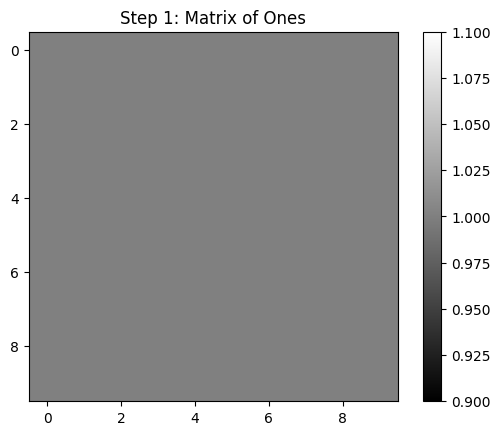

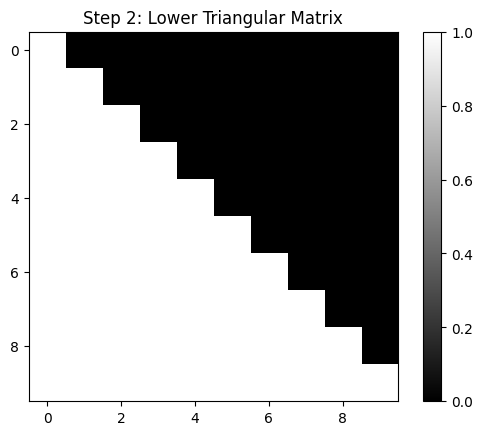

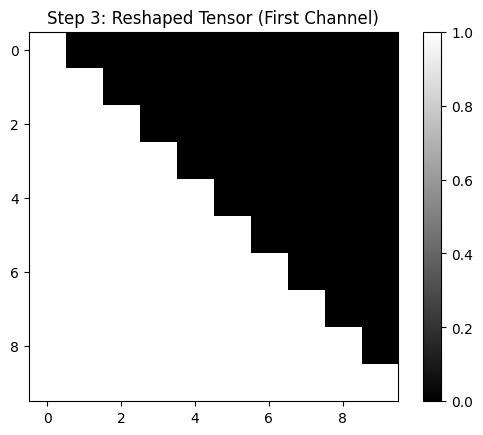

In [1]:
import torch
import matplotlib.pyplot as plt

# Define the block size (for visualization purposes, we use a small block size)
block_size = 10  # Example block size

# Step 1: Create a matrix of ones
ones_matrix = torch.ones(block_size, block_size)

# Step 2: Apply the lower triangular mask
lower_triangular_matrix = torch.tril(ones_matrix)

# Step 3: Reshape the tensor to (1, 1, block_size, block_size)
reshaped_tensor = lower_triangular_matrix.view(1, 1, block_size, block_size)

# Function to visualize a 2D tensor
def visualize_tensor(tensor, title):
    plt.imshow(tensor, cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Visualize each step
visualize_tensor(ones_matrix, 'Step 1: Matrix of Ones')
visualize_tensor(lower_triangular_matrix, 'Step 2: Lower Triangular Matrix')
visualize_tensor(reshaped_tensor[0, 0], 'Step 3: Reshaped Tensor (First Channel)')

In [3]:
torch.tril(torch.ones(5, 5)).view(1, 1, 5, 5)

tensor([[[[1., 0., 0., 0., 0.],
          [1., 1., 0., 0., 0.],
          [1., 1., 1., 0., 0.],
          [1., 1., 1., 1., 0.],
          [1., 1., 1., 1., 1.]]]])

In [2]:
import torch
torch.ones(5, 5)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [3]:
import torch

batch_size = 2  # Number of examples in the batch
sequence_length = 3  # Length of the sequence for each example
embedding_dimension = 4  # Dimension of the embedding space

# Create a sample tensor (qkv) with random values
qkv = torch.randn(batch_size, sequence_length, embedding_dimension)

qkv


tensor([[[-0.1616, -0.3218, -1.2484,  0.1107],
         [ 0.4765, -0.5958, -1.1021, -0.9545],
         [ 1.5487, -0.3750, -0.6141,  1.5547]],

        [[-0.6562, -0.0133,  0.3805, -0.9534],
         [ 1.1095, -0.0878, -0.4338, -0.5960],
         [ 0.1656, -0.2282, -0.9274,  0.8518]]])